# Student Name: Emirhan Utku
# Student ID: 2210765029
# Date: November 5, 2024

# AIN429 Data Mining Laboratory - Assignment 2
### Comprehensive Data Preprocessing

---

## Part 1: Dataset Import and Summary

In this section, we load and explore the provided datasets to understand their structure, summary statistics, and potential initial issues. This exploration will guide subsequent preprocessing steps.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Introduction to the Datasets

This analysis uses two datasets, referred to as the **Main Dataset** and the **Additional Dataset**. Each dataset includes several geometric and shape-related features that capture characteristics of objects, including measurements such as `Area`, `Perimeter`, `MajorAxisLength`, `MinorAxisLength`, `AspectRation`, and more. These datasets have been combined, preprocessed, and analyzed to reveal patterns, trends, and relationships among features. The goal of this analysis is to prepare a clean, consistent dataset suitable for machine learning tasks, using techniques such as handling missing values, scaling, and dimensionality reduction.


In [2]:
main_data = pd.read_csv('data 2/Data_Main.csv')
additional_data = pd.read_csv('data 2/Data_Additional.csv')


def dataset_info(df, name):
    print(f"{name} Dataset Shape: {df.shape}")
    print(f"\n{name} Dataset - Basic Information:")
    print(df.info())
    print(f"\n{name} Dataset - Missing Values Per Column:")
    print(df.isnull().sum())
    print(f"\n{name} Dataset - Unique Values Per Column (First 5 Columns):")
    for col in df.columns[:5]:
        print(f"{col}: {df[col].nunique()} unique values")
    print("\n")

dataset_info(main_data, "Main")
dataset_info(additional_data, "Additional")


Main Dataset Shape: (9565, 17)

Main Dataset - Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9565 entries, 0 to 9564
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             9509 non-null   float64
 1   Perimeter        9527 non-null   float64
 2   MajorAxisLength  9527 non-null   float64
 3   MinorAxisLength  9527 non-null   float64
 4   AspectRation     9527 non-null   float64
 5   Eccentricity     9527 non-null   float64
 6   ConvexArea       9527 non-null   float64
 7   EquivDiameter    9527 non-null   float64
 8   Extent           9527 non-null   float64
 9   Solidity         9478 non-null   float64
 10  roundness        9527 non-null   float64
 11  Compactness      9527 non-null   float64
 12  ShapeFactor1     9527 non-null   float64
 13  ShapeFactor2     9527 non-null   float64
 14  ShapeFactor3     9527 non-null   float64
 15  ShapeFactor4     9527 non-null   float64

## Dataset Import and Summary

### Main Dataset Overview
- **Shape**: 9565 rows and 17 columns
- **Data Types**: 16 numerical features (`float64`) and 1 categorical feature (`object` for `Class`).
- **Missing Values**:
  - **Notable Columns with Missing Values**: `Area` (56 missing), `Solidity` (87 missing), and 15 other features each missing 38 values.
- **Unique Values** (First 5 columns):
  - `Area`: 8707 unique values, indicating a continuous feature.
  - `Perimeter`: 9402 unique values.
  - `MajorAxisLength` and `MinorAxisLength`: 9499 unique values each, likely continuous as well.
  - `AspectRation`: 9499 unique values, potentially continuous with slight variation.

**Initial Observations**:
- Most numerical features contain a large variety of values, suggesting continuous distributions.
- The `Class` column has 38 missing values, which we’ll need to handle before analysis.
- Missing values and high variance across columns will require specific attention in the preprocessing phase.

---

### Additional Dataset Overview
- **Shape**: 4099 rows and 18 columns
- **Data Types**: 17 numerical features (`float64`) and 1 categorical feature (`object` for `Class`).
- **Missing Values**:
  - **Notable Columns with Missing Values**: `Area` (22 missing), `Perimeter` (15 missing), and others with similar missing counts. 
  - `Color` column has no valid data, with all values missing.
- **Unique Values** (First 5 columns):
  - `Area`: 3923 unique values.
  - `Perimeter`: 4053 unique values.
  - `Length` and `Width`: 4077 unique values each, suggesting these are continuous features.
  - `AspectRation`: 4077 unique values, likely continuous as well.

**Initial Observations**:
- Missing values are less frequent compared to the main dataset, with most features containing only 15 missing entries.
- The `Color` feature has no available data, so it may be dropped if not essential to the analysis.
- The variety in values across columns confirms these are mostly continuous features, compatible with further scaling and PCA in later stages.

---


In [3]:
display(main_data.head())

display(additional_data.head())


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,53663.0,914.023,378.600140,181.647777,2.084254,0.877384,54314.0,261.392145,0.638025,0.988014,0.807180,0.690417,0.007055,0.000989,0.476676,0.993514,HOROZ
1,81701.0,1069.534,405.402871,258.923147,1.565727,0.769472,83006.0,322.528982,0.750053,0.984278,0.897528,0.795576,0.004962,0.001226,0.632942,0.991014,CALI
2,40693.0,770.418,290.248493,179.230720,1.619413,0.786565,41174.0,227.622356,0.689887,0.988318,0.861543,0.784233,0.007133,0.001664,0.615021,0.995973,SIRA
3,30835.0,663.731,250.374047,157.372914,1.590960,0.777768,31272.0,198.142225,0.737485,0.986026,0.879568,0.791385,0.008120,0.001965,0.626290,0.996402,DERMASON
4,66997.0,978.189,381.136300,226.262814,1.684485,0.804721,68032.0,292.067167,0.788423,0.984787,0.879872,0.766306,0.005689,0.001210,0.587225,0.989172,CALI


,Area,Perimeter,Length,Width,AspectRation,Class,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Eccentricity,Color
0,28734.0,638.018,200.524796,182.734419,1.097356,SEKER,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0.411785,NaN
1,30140.0,620.134,201.847882,190.279279,1.060798,SEKER,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0.333680,NaN
2,30279.0,634.927,212.560556,181.510182,1.171067,SEKER,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,0.520401,NaN
3,30477.0,670.033,211.050155,184.039050,1.146768,SEKER,30970.0,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,0.489478,NaN
4,30519.0,629.727,212.996755,182.737204,1.165591,SEKER,30847.0,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,0.513760,NaN


### Summary Statistics

To gain an understanding of each feature's range, distribution, and central tendencies, we compute basic summary statistics, including the mean, median, and standard deviation for numerical features.


### Overview of Dataset Structure and Summary Statistics

#### Main Dataset Summary Statistics
The main dataset comprises 9565 observations and 17 features, with the following characteristics:

- **Area**: Mean of 53,102.86 with a standard deviation of 29,055.04, ranging from 20,420 to 251,432.
- **Perimeter**: Mean of 855.95 with a high variance (std = 212.77), showing a range from 524.93 to 1921.69.
- **MajorAxisLength and MinorAxisLength**: These features exhibit means around 320.16 and 202.63, respectively, indicating the dataset likely includes measurements of elongated shapes.
- **AspectRatio**: Mean of 1.58, with values ranging between 1.04 and 2.43, suggesting various degrees of elongation.
- **Solidity and Roundness**: Solidity has a high mean (0.987) with low variation, while roundness shows more variation (mean = 0.873).
- **ShapeFactor features**: These factors have small values but display consistent ranges across the dataset.

#### Additional Dataset Summary Statistics
The additional dataset contains 4099 rows and 18 features. Key observations include:

- **Area**: Slightly lower mean than the main dataset (52,930.00) with similar high variance, spanning from 20,548 to 254,616.
- **Perimeter, Length, and Width**: These features follow similar trends to the main dataset, with Perimeter and Length centered around 853.73 and 320.10, respectively.
- **AspectRatio**: Mean of 1.59, aligning closely with the main dataset's distribution.
- **Color Feature**: Contains only missing values (all `NaN`), likely to be dropped in further preprocessing steps.
- **Eccentricity**: Shows variation in distribution (mean = 0.753), indicating different shape eccentricities within the data.

#### Summary of Key Findings
- **Consistent Feature Distributions**: Both datasets show similar distributions across common features, suggesting they may be compatible for integration.
- **Outliers and High Variance**: Features such as Area and Perimeter exhibit high variance and extreme values, which may need attention in preprocessing to avoid skewing model performance.
- **Potential Irrelevant Feature**: The Color column in the additional dataset has no data and is a candidate for removal.


In [4]:
print("Main Dataset Summary Statistics:")
main_summary = main_data.describe()
display(main_summary)

print("\nAdditional Dataset Summary Statistics:")
additional_summary = additional_data.describe()
display(additional_summary)


Main Dataset Summary Statistics:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,9509.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9478.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000
mean,53102.860027,855.950827,320.159026,202.629624,1.580527,0.749913,53819.091949,253.298790,0.749730,0.987150,0.873511,0.800528,0.006548,0.001718,0.644652,0.995069
std,29055.036879,212.772625,85.084259,44.605666,0.245614,0.092438,29490.728952,58.703709,0.048710,0.004666,0.059416,0.061703,0.001120,0.000596,0.099104,0.004399
min,20420.000000,524.932000,183.601165,122.512653,1.036423,0.262774,20684.000000,161.243764,0.555315,0.943559,0.489618,0.640577,0.002778,0.000567,0.410339,0.949990
25%,36481.000000,704.692500,253.320436,176.302846,1.430310,0.714976,36861.500000,215.520421,0.719049,0.985624,0.832750,0.762943,0.005874,0.001156,0.582082,0.993666
50%,44710.000000,795.724000,297.390659,192.881799,1.549411,0.763839,45258.000000,238.592833,0.759942,0.988297,0.883082,0.801663,0.006631,0.001689,0.642664,0.996423
75%,61720.000000,977.981000,376.111433,217.744917,1.704391,0.809790,62710.000000,280.292656,0.786297,0.990039,0.916986,0.834642,0.007251,0.002170,0.696627,0.997893
max,251432.000000,1921.685000,738.144502,460.198497,2.430306,0.911423,257425.000000,565.803115,0.858420,0.994677,0.990685,0.981611,0.010451,0.003573,0.963560,0.999733



Additional Dataset Summary Statistics:


,Area,Perimeter,Length,Width,AspectRation,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Eccentricity,Color
count,4077.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,0.0
mean,52930.002208,853.726648,320.101841,201.433463,1.589575,53649.481881,252.517023,0.749739,0.987139,0.872748,0.798314,0.006599,0.001712,0.641113,0.995050,0.753185,NaN
std,29998.073066,217.805939,87.110906,45.803529,0.249059,30430.867309,60.270739,0.049960,0.004629,0.059764,0.061716,0.001147,0.000596,0.098712,0.004290,0.090946,NaN
min,20548.000000,524.736000,183.965251,129.576207,1.024868,20825.000000,161.748342,0.566669,0.919246,0.577844,0.648762,0.002902,0.000564,0.420892,0.947687,0.218951,NaN
25%,35975.000000,701.503250,253.073656,174.754001,1.434815,36397.500000,214.065899,0.717193,0.985759,0.831335,0.761274,0.005957,0.001147,0.579538,0.993772,0.717116,NaN
50%,44468.000000,793.375500,296.301489,191.264037,1.555313,45053.000000,238.011777,0.759674,0.988241,0.883419,0.800318,0.006687,0.001703,0.640509,0.996330,0.765902,NaN
75%,60453.000000,972.722750,376.818048,215.169957,1.711638,61367.500000,277.467724,0.788210,0.989940,0.916535,0.833422,0.007321,0.002171,0.694593,0.997853,0.811584,NaN
max,254616.000000,1985.370000,738.860154,447.418329,2.364017,263261.000000,569.374358,0.866195,0.993945,0.984877,0.987303,0.009897,0.003665,0.974767,0.999660,0.906126,NaN


### Visualization of Feature Distributions

Visualizations are used to observe feature distributions and identify potential outliers. This initial exploration guides the necessary transformations in preprocessing.

- **Histograms** for numerical features show the distribution shape, skewness, and outliers.
- **Box plots** help visualize the spread of data and highlight outliers.



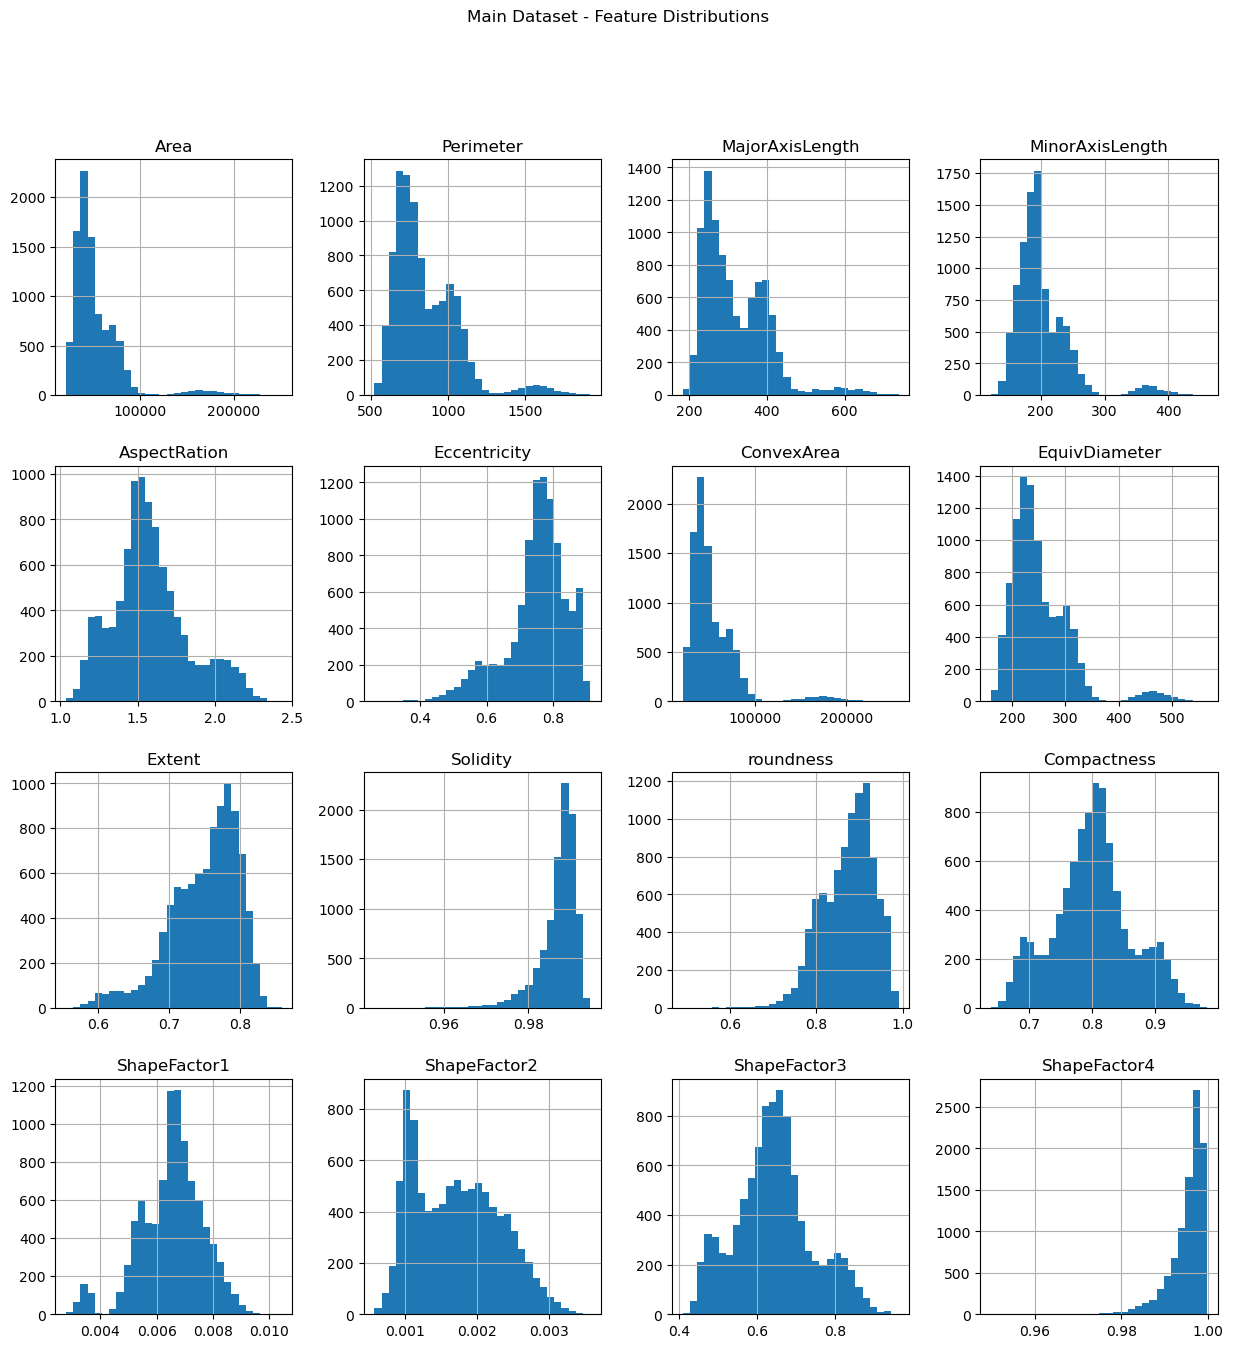

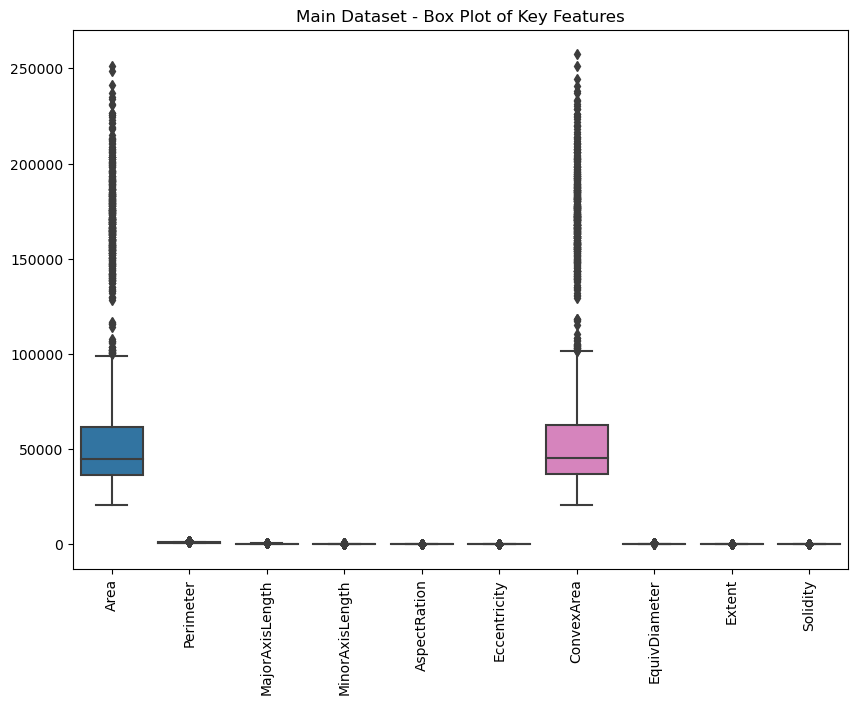

In [5]:
main_data.hist(bins=30, figsize=(15, 15))
plt.suptitle('Main Dataset - Feature Distributions')
plt.show()

plt.figure(figsize=(10, 7))
sns.boxplot(data=main_data.select_dtypes(include=['float64', 'int64']).iloc[:, :10])
plt.title('Main Dataset - Box Plot of Key Features')
plt.xticks(rotation=90)
plt.show()


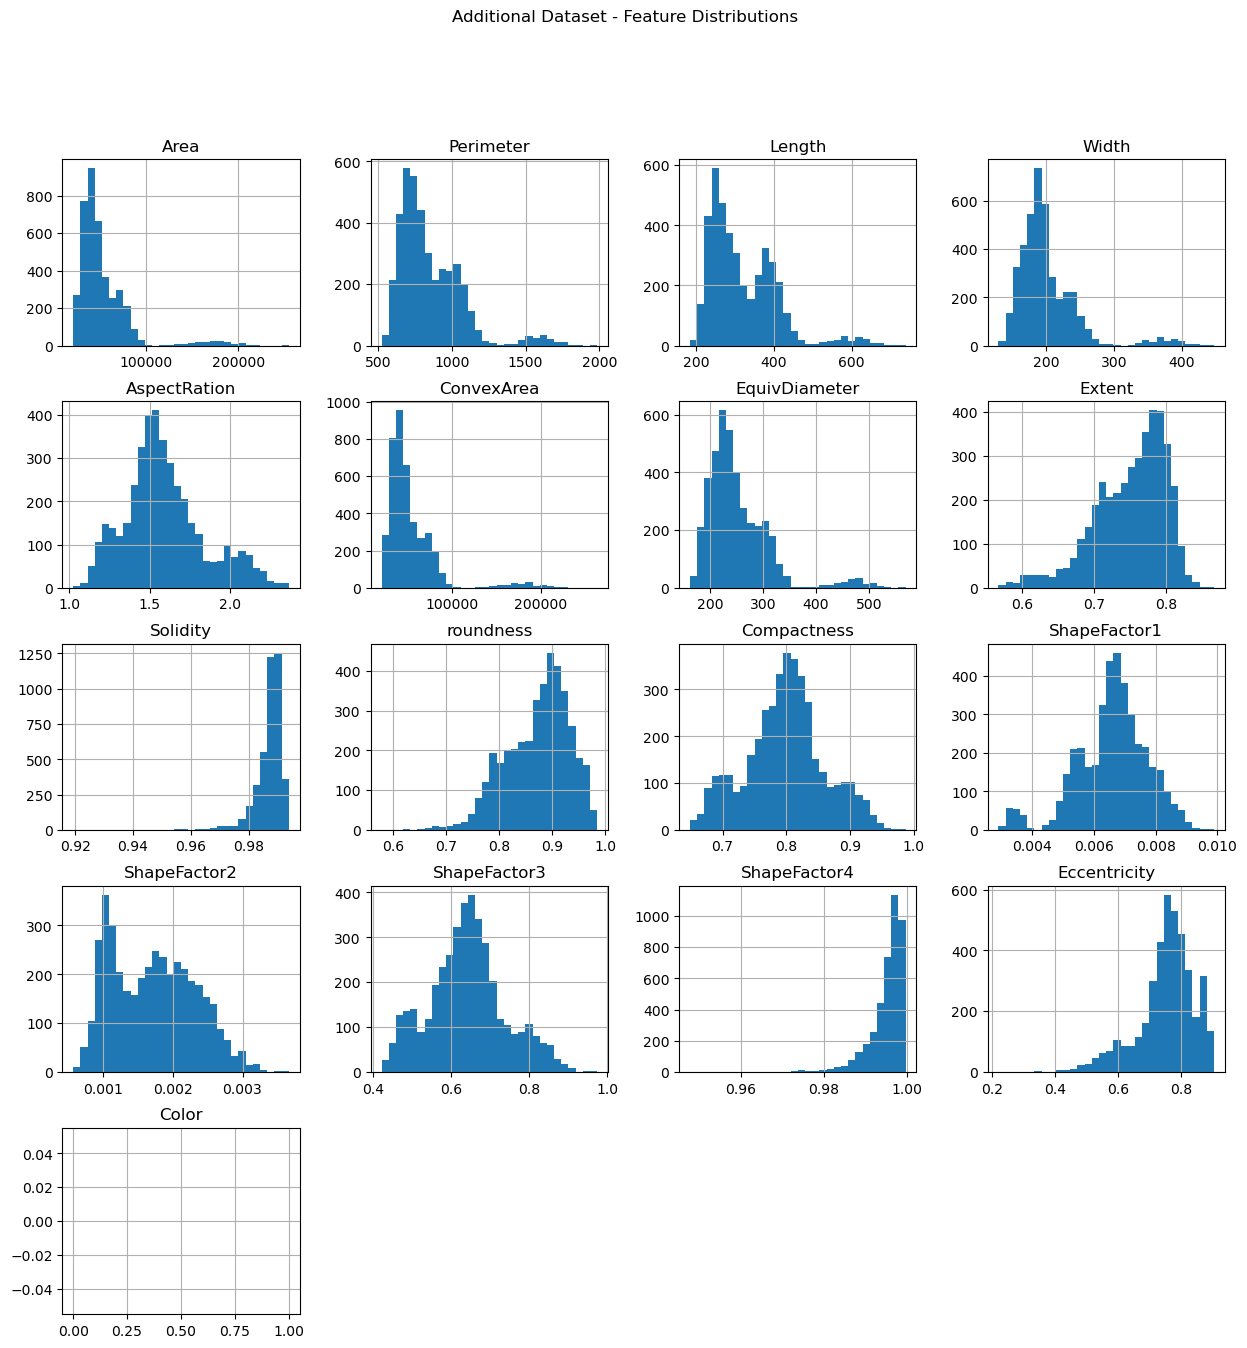

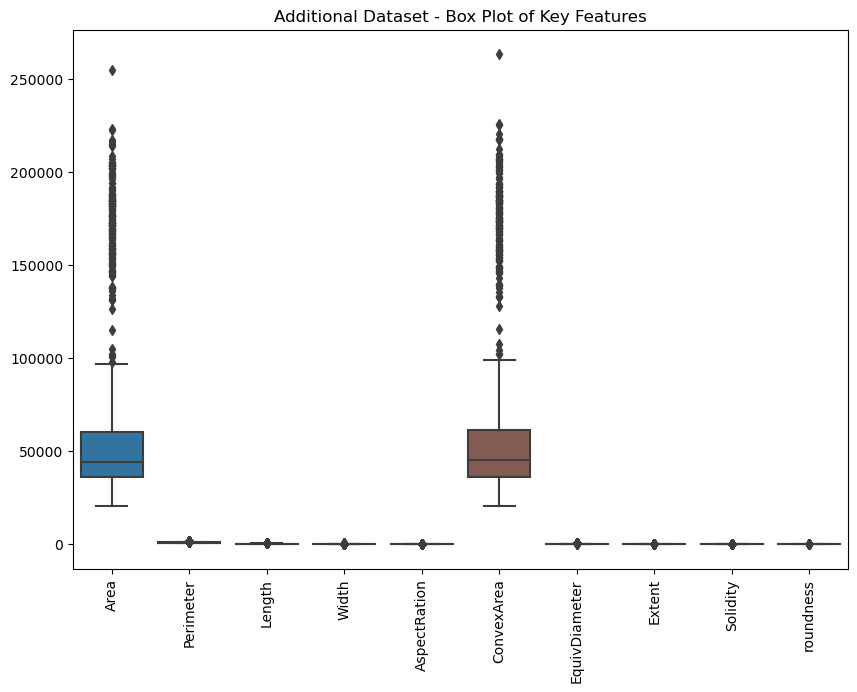

In [6]:
additional_data.hist(bins=30, figsize=(15, 15))
plt.suptitle('Additional Dataset - Feature Distributions')
plt.show()

plt.figure(figsize=(10, 7))
sns.boxplot(data=additional_data.select_dtypes(include=['float64']).iloc[:, :10])
plt.title('Additional Dataset - Box Plot of Key Features')
plt.xticks(rotation=90)
plt.show()


### Initial Insights and Observations from Raw Data

1. **Incomplete Data**:
   - Both datasets contain missing values in several features, with notable gaps in the `Area`, `Perimeter`, and `Solidity` columns in the main dataset.
   - The `Color` column in the additional dataset has no valid data (all values are missing), making it a likely candidate for removal unless there is contextual importance.

2. **Outliers**:
   - Visualizations reveal substantial outliers in several features, especially in `Area`, `Perimeter`, and `ConvexArea`. These outliers are visible as extreme values on the histograms and through the elongated whiskers in the box plots.

3. **Feature Distribution and Skewness**:
   - Many features, such as `Area`, `Perimeter`, `MajorAxisLength`, and `MinorAxisLength`, are right-skewed, with a concentration of values toward the lower end of the range and a long tail of high values.
   - Features like `Solidity` and `ShapeFactor` values show relatively consistent distributions with limited variance, suggesting they might have less influence on distinguishing between classes in subsequent analysis.

4. **Data Consistency Across Datasets**:
   - Common features between the main and additional datasets exhibit similar distributions, which indicates potential compatibility for merging. For example, the distributions of `AspectRatio` and `Eccentricity` align closely in both datasets.


## Part 2: Data Integration

-----
**We dropped the color column in our additional dataset because it was completely empty and we could not do any filling.**

In [7]:
additional_data = additional_data.drop(columns=['Color'], errors='ignore')

**We match columns that are the same in two datasets but have different names.**

In [8]:
additional_data = additional_data.rename(columns={
    'Length': 'MajorAxisLength',
    'Width': 'MinorAxisLength'
})

In [9]:
main_columns = set(main_data.columns)
additional_columns = set(additional_data.columns)

missing_in_additional = main_columns - additional_columns
missing_in_main = additional_columns - main_columns

print("Columns in Main Dataset but missing in Additional Dataset:", missing_in_additional)
print("Columns in Additional Dataset but missing in Main Dataset:", missing_in_main)

Columns in Main Dataset but missing in Additional Dataset: set()
Columns in Additional Dataset but missing in Main Dataset: set()


**The column numbers and names of our two datasets are now the same.**

In [10]:
additional_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Class,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Eccentricity
0,28734.0,638.018,200.524796,182.734419,1.097356,SEKER,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0.411785
1,30140.0,620.134,201.847882,190.279279,1.060798,SEKER,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0.333680
2,30279.0,634.927,212.560556,181.510182,1.171067,SEKER,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,0.520401
3,30477.0,670.033,211.050155,184.039050,1.146768,SEKER,30970.0,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,0.489478
4,30519.0,629.727,212.996755,182.737204,1.165591,SEKER,30847.0,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,0.513760


In [11]:
main_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,53663.0,914.023,378.600140,181.647777,2.084254,0.877384,54314.0,261.392145,0.638025,0.988014,0.807180,0.690417,0.007055,0.000989,0.476676,0.993514,HOROZ
1,81701.0,1069.534,405.402871,258.923147,1.565727,0.769472,83006.0,322.528982,0.750053,0.984278,0.897528,0.795576,0.004962,0.001226,0.632942,0.991014,CALI
2,40693.0,770.418,290.248493,179.230720,1.619413,0.786565,41174.0,227.622356,0.689887,0.988318,0.861543,0.784233,0.007133,0.001664,0.615021,0.995973,SIRA
3,30835.0,663.731,250.374047,157.372914,1.590960,0.777768,31272.0,198.142225,0.737485,0.986026,0.879568,0.791385,0.008120,0.001965,0.626290,0.996402,DERMASON
4,66997.0,978.189,381.136300,226.262814,1.684485,0.804721,68032.0,292.067167,0.788423,0.984787,0.879872,0.766306,0.005689,0.001210,0.587225,0.989172,CALI


---

**To ensure consistency between the main and additional datasets, we reordered the columns in the additional dataset to match the column order in the main dataset. This alignment is essential for a seamless integration of both datasets.**


In [12]:
additional_data = additional_data[main_data.columns]

In [13]:
additional_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
1,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
2,30279.0,634.927,212.560556,181.510182,1.171067,0.520401,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
3,30477.0,670.033,211.050155,184.039050,1.146768,0.489478,30970.0,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
4,30519.0,629.727,212.996755,182.737204,1.165591,0.513760,30847.0,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,41962.0,755.945,286.870391,186.588937,1.537446,0.759567,42349.0,231.144279,0.764711,0.990862,0.922753,0.805745,0.006836,0.001777,0.649224,0.998147,DERMASON
4095,41966.0,746.121,273.508678,195.449153,1.399385,0.699534,42250.0,231.155296,0.751998,0.993278,0.947303,0.845148,0.006517,0.002051,0.714275,0.999546,DERMASON
4096,41995.0,765.763,284.073178,188.591957,1.506285,0.747835,42477.0,231.235150,0.732514,0.988653,0.899951,0.813999,0.006764,0.001832,0.662594,0.998055,DERMASON
4097,42023.0,746.715,272.962686,196.334047,1.390297,0.694730,42365.0,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,DERMASON


---

**After doing all the pre-processing, all that's left is to merge**

In [14]:
combined_data = pd.concat([main_data, additional_data], ignore_index=True)

In [15]:
print("Combined Dataset Shape:", combined_data.shape)
print("\nCombined Dataset Info:")
combined_data.info()

Combined Dataset Shape: (13664, 17)

Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664 entries, 0 to 13663
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13586 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13562 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16

In [16]:
combined_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,53663.0,914.023,378.600140,181.647777,2.084254,0.877384,54314.0,261.392145,0.638025,0.988014,0.807180,0.690417,0.007055,0.000989,0.476676,0.993514,HOROZ
1,81701.0,1069.534,405.402871,258.923147,1.565727,0.769472,83006.0,322.528982,0.750053,0.984278,0.897528,0.795576,0.004962,0.001226,0.632942,0.991014,CALI
2,40693.0,770.418,290.248493,179.230720,1.619413,0.786565,41174.0,227.622356,0.689887,0.988318,0.861543,0.784233,0.007133,0.001664,0.615021,0.995973,SIRA
3,30835.0,663.731,250.374047,157.372914,1.590960,0.777768,31272.0,198.142225,0.737485,0.986026,0.879568,0.791385,0.008120,0.001965,0.626290,0.996402,DERMASON
4,66997.0,978.189,381.136300,226.262814,1.684485,0.804721,68032.0,292.067167,0.788423,0.984787,0.879872,0.766306,0.005689,0.001210,0.587225,0.989172,CALI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13659,41962.0,755.945,286.870391,186.588937,1.537446,0.759567,42349.0,231.144279,0.764711,0.990862,0.922753,0.805745,0.006836,0.001777,0.649224,0.998147,DERMASON
13660,41966.0,746.121,273.508678,195.449153,1.399385,0.699534,42250.0,231.155296,0.751998,0.993278,0.947303,0.845148,0.006517,0.002051,0.714275,0.999546,DERMASON
13661,41995.0,765.763,284.073178,188.591957,1.506285,0.747835,42477.0,231.235150,0.732514,0.988653,0.899951,0.813999,0.006764,0.001832,0.662594,0.998055,DERMASON
13662,42023.0,746.715,272.962686,196.334047,1.390297,0.694730,42365.0,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,DERMASON


In [17]:
combined_data.describe(include='all')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13586.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13562.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DERMASON
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3546
mean,53050.987414,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987147,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,NaN
std,29340.213328,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004655,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,NaN
25%,36325.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985676,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,NaN
50%,44651.500000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988285,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,NaN
75%,61332.500000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,NaN


---

### Post-Integration Check and Adjustments

After integrating the main and additional datasets, we conducted a post-integration check to identify remaining missing values and inconsistencies:

1. **Numerical Columns**:
   - Missing values were filled with the column mean to maintain the data distribution without removing any observations.
  
2. **Categorical Columns**:
   - Missing values were filled with the mode (most frequent value) of each categorical column. 
   - Using the mode preserves the natural distribution and avoids introducing a placeholder that might skew categorical analyses.

After these adjustments, we verified that there are no remaining missing values in the `combined_data` dataset, ensuring it is ready for further preprocessing and analysis.


In [18]:
combined_data.dtypes

Area               float64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [19]:
combined_data_original = combined_data.copy()

**We create and save a copy of the raw data to compare the raw data and the preprocessed data.**

In [20]:
combined_data_simple = combined_data.copy()



missing_values = combined_data_simple.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values After Integration:")
print(missing_values)

Columns with Missing Values After Integration:
Area                78
Perimeter           53
MajorAxisLength     53
MinorAxisLength     53
AspectRation        53
Eccentricity        53
ConvexArea          53
EquivDiameter       53
Extent              53
Solidity           102
roundness           53
Compactness         53
ShapeFactor1        53
ShapeFactor2        53
ShapeFactor3        53
ShapeFactor4        53
Class               53
dtype: int64


In [21]:
numerical_cols = combined_data_simple.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if col in missing_values.index:  
        combined_data_simple[col].fillna(combined_data_simple[col].mean(), inplace=True)


categorical_cols = combined_data_simple.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col in missing_values.index:
        combined_data_simple[col].fillna(combined_data_simple[col].mode()[0], inplace=True)


print("\nMissing Values After Adjustments:")
print(combined_data_simple.isnull().sum())  


Missing Values After Adjustments:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [22]:
combined_data_simple

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,53663.0,914.023,378.600140,181.647777,2.084254,0.877384,54314.0,261.392145,0.638025,0.988014,0.807180,0.690417,0.007055,0.000989,0.476676,0.993514,HOROZ
1,81701.0,1069.534,405.402871,258.923147,1.565727,0.769472,83006.0,322.528982,0.750053,0.984278,0.897528,0.795576,0.004962,0.001226,0.632942,0.991014,CALI
2,40693.0,770.418,290.248493,179.230720,1.619413,0.786565,41174.0,227.622356,0.689887,0.988318,0.861543,0.784233,0.007133,0.001664,0.615021,0.995973,SIRA
3,30835.0,663.731,250.374047,157.372914,1.590960,0.777768,31272.0,198.142225,0.737485,0.986026,0.879568,0.791385,0.008120,0.001965,0.626290,0.996402,DERMASON
4,66997.0,978.189,381.136300,226.262814,1.684485,0.804721,68032.0,292.067167,0.788423,0.984787,0.879872,0.766306,0.005689,0.001210,0.587225,0.989172,CALI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13659,41962.0,755.945,286.870391,186.588937,1.537446,0.759567,42349.0,231.144279,0.764711,0.990862,0.922753,0.805745,0.006836,0.001777,0.649224,0.998147,DERMASON
13660,41966.0,746.121,273.508678,195.449153,1.399385,0.699534,42250.0,231.155296,0.751998,0.993278,0.947303,0.845148,0.006517,0.002051,0.714275,0.999546,DERMASON
13661,41995.0,765.763,284.073178,188.591957,1.506285,0.747835,42477.0,231.235150,0.732514,0.988653,0.899951,0.813999,0.006764,0.001832,0.662594,0.998055,DERMASON
13662,42023.0,746.715,272.962686,196.334047,1.390297,0.694730,42365.0,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,DERMASON


In [23]:
combined_data_simple.describe(include='all')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DERMASON
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3599
mean,53050.987414,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987147,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,NaN
std,29256.344038,213.873668,85.527817,44.882785,0.246200,0.091823,29717.109922,59.062232,0.048991,0.004637,0.059404,0.061594,0.001126,0.000595,0.098804,0.004358,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,NaN
25%,36381.500000,703.872000,253.427049,175.914987,1.432902,0.716210,36743.500000,215.186374,0.718728,0.985715,0.832538,0.762683,0.005905,0.001155,0.581685,0.993720,NaN
50%,44741.000000,795.915000,297.444401,192.547574,1.552111,0.764078,45261.000000,238.602172,0.759494,0.988257,0.882803,0.800988,0.006641,0.001699,0.642332,0.996373,NaN
75%,61158.750000,975.935250,376.175003,216.790708,1.706112,0.810219,62179.500000,279.237368,0.786795,0.989998,0.916790,0.834044,0.007269,0.002169,0.695629,0.997875,NaN


**Here we actually did a simple "Post-Integration Check". We filled the missing numerical values ​​directly with 'mean' and used direct 'mode' for categorical. Instead of using our main combined dataset for this, I used a copy just to show it. I will apply more complicated algorithms in the next step.**

---

## Part 3: Data Preprocessing

### Advanced Data Cleaning with Feature-Specific Imputation

1. **Numerical Columns**:
   - Outlier-sensitive features (e.g., `Area`, `Perimeter`) were imputed using the median to mitigate the impact of outliers.
   - Remaining numerical features were imputed using K-Nearest Neighbors (KNN) Imputer, a predictive model that fills missing values based on similar data points, potentially capturing more accurate patterns.

2. **Categorical Columns**:
   - Categorical features with fewer missing values (less than 5% of entries) were filled with the mode (most frequent label), which maintains consistency within these categories.
   - For columns with higher missing data ratios, mode filling was also applied as a simple approach, though additional imputation methods could be explored.

This advanced, feature-specific imputation strategy addresses both outlier sensitivity and feature relevance, resulting in a dataset with no remaining missing values and distributions that better reflect underlying patterns.


In [24]:
missing_values = combined_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values After Integration:")
print(missing_values)

Columns with Missing Values After Integration:
Area                78
Perimeter           53
MajorAxisLength     53
MinorAxisLength     53
AspectRation        53
Eccentricity        53
ConvexArea          53
EquivDiameter       53
Extent              53
Solidity           102
roundness           53
Compactness         53
ShapeFactor1        53
ShapeFactor2        53
ShapeFactor3        53
ShapeFactor4        53
Class               53
dtype: int64


In [25]:

numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns

outlier_sensitive_cols = ['Area', 'Perimeter'] 

for col in outlier_sensitive_cols:
    if combined_data[col].isnull().sum() > 0:
        combined_data[col].fillna(combined_data[col].median(), inplace=True)

imputer = KNNImputer(n_neighbors=10)
non_outlier_cols = [col for col in numerical_cols if col not in outlier_sensitive_cols]
combined_data[non_outlier_cols] = imputer.fit_transform(combined_data[non_outlier_cols])
for col in categorical_cols:
    missing_ratio = combined_data[col].isnull().sum() / len(combined_data)
    if missing_ratio < 0.05:
        combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)
    else:
  


        combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)


print("\nMissing Values After Advanced Feature-Specific Imputation:")
print(combined_data.isnull().sum().sum())  





Missing Values After Advanced Feature-Specific Imputation:
0


In [26]:
combined_data[numerical_cols].describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000,13664.000000
mean,53003.039520,855.049402,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987147,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29263.187361,213.906558,85.527817,44.882785,0.246200,0.091823,29717.109922,59.062232,0.048991,0.004640,0.059404,0.061594,0.001126,0.000595,0.098804,0.004358
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36381.500000,703.872000,253.427049,175.914987,1.432902,0.716210,36743.500000,215.186374,0.718728,0.985697,0.832538,0.762683,0.005905,0.001155,0.581685,0.993720
50%,44651.500000,794.941000,297.444401,192.547574,1.552111,0.764078,45261.000000,238.602172,0.759494,0.988270,0.882803,0.800988,0.006641,0.001699,0.642332,0.996373
75%,61158.750000,975.935250,376.175003,216.790708,1.706112,0.810219,62179.500000,279.237368,0.786795,0.989999,0.916790,0.834044,0.007269,0.002169,0.695629,0.997875
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


**Important note: Here, we used kNN in other columns except for 'outlier sensitive columns', but it seems that there is not much difference compared to filling with mean() in post-integration for comparison. This is because the missing values ​​are less. If there were a lot more missing values, filling with kNN would give a more consistent result.**

### Scaling of Numerical Features

To standardize our data, we applied **Z-score Standardization** (Standard Scaling) to the numerical features. This method centers each feature around `0` with a standard deviation of `1`, making the data suitable for many machine learning models that are sensitive to feature scale.

#### Why Z-score Standardization?

- **Presence of Outliers**: Standard scaling is less affected by extreme values, which helps mitigate the impact of outliers we observed in features like `Area` and `Perimeter`.
- **Suitability for Modeling**: Many machine learning algorithms perform better when the data is standardized, especially those relying on distance measurements (e.g., K-Nearest Neighbors, SVM).

#### Effect on Feature Distributions

After standardization, all numerical features have a mean of approximately `0` and a standard deviation close to `1`. This transformation ensures that each feature contributes proportionately in subsequent analysis or modeling.


In [27]:
scaler = StandardScaler()

numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns


combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

print("Summary Statistics After Standard Scaling:")

display(combined_data[numerical_cols].describe())


Summary Statistics After Standard Scaling:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04,1.366400e+04
mean,5.838340e-17,-3.748628e-16,9.338581e-16,-1.970577e-16,-9.715264e-17,-5.399398e-16,-4.653284e-17,-5.905779e-17,-1.988635e-16,-1.826621e-14,-1.402030e-15,-3.553583e-16,-3.443741e-16,2.132491e-16,-9.977666e-16,2.102719e-14
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.113489e+00,-1.544251e+00,-1.596506e+00,-1.777095e+00,-2.268058e+00,-5.793345e+00,-1.113346e+00,-1.554696e+00,-3.968584e+00,-1.463578e+01,-6.458748e+00,-2.586188e+00,-3.362681e+00,-1.936751e+00,-2.360838e+00,-1.087147e+01
25%,-5.680225e-01,-7.067709e-01,-7.800650e-01,-5.872339e-01,-6.106652e-01,-3.777459e-01,-5.729132e-01,-6.413444e-01,-6.328966e-01,-3.126385e-01,-6.859044e-01,-6.036701e-01,-5.849789e-01,-9.435285e-01,-6.265680e-01,-3.082230e-01
50%,-2.854045e-01,-2.810134e-01,-2.653908e-01,-2.166420e-01,-1.264498e-01,1.435704e-01,-2.862833e-01,-2.448701e-01,1.992599e-01,2.420884e-01,1.602854e-01,1.825119e-02,6.902049e-02,-2.861350e-02,-1.273161e-02,3.005684e-01
75%,2.787123e-01,5.651546e-01,6.551691e-01,3.235210e-01,4.990871e-01,6.460881e-01,2.830560e-01,4.431615e-01,7.565446e-01,6.147572e-01,7.324283e-01,5.549472e-01,6.263547e-01,7.611351e-01,5.267051e-01,6.452824e-01
max,6.889897e+00,5.284373e+00,4.895876e+00,5.746908e+00,3.440687e+00,1.748295e+00,7.049826e+00,5.355736e+00,2.377293e+00,1.623153e+00,1.976419e+00,3.043271e+00,3.453255e+00,3.277345e+00,3.351982e+00,1.071457e+00


In [28]:
combined_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.022553,0.275708,0.683525,-0.459501,2.035059,1.377585,0.018367,0.141008,-2.280251,0.186891,-1.112780,-1.776973,0.436622,-1.222628,-1.689406,-0.355410,HOROZ
1,0.980721,1.002739,0.996917,1.262277,-0.071145,0.202316,0.983907,1.176171,0.006532,-0.618367,0.408171,-0.069607,-1.422654,-0.823498,-0.107776,-0.929204,CALI
2,-0.420682,-0.395661,-0.349529,-0.513356,0.146921,0.388476,-0.423819,-0.430779,-1.221605,0.252359,-0.197624,-0.253785,0.505460,-0.086988,-0.289162,0.208663,SIRA
3,-0.757568,-0.894434,-0.815762,-1.000371,0.031351,0.292674,-0.757039,-0.929934,-0.250002,-0.241680,0.105830,-0.137663,1.382339,0.418132,-0.175103,0.307289,DERMASON
4,0.478228,0.575691,0.713179,0.534570,0.411238,0.586214,0.480004,0.660395,0.789761,-0.508799,0.110947,-0.544838,-0.777028,-0.850630,-0.570492,-1.351809,CALI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13659,-0.377315,-0.463324,-0.389028,-0.349407,-0.186019,0.094444,-0.384278,-0.371147,0.305750,0.800661,0.832824,0.095483,0.242345,0.103430,0.057027,0.707715,DERMASON
13660,-0.377178,-0.509252,-0.545260,-0.151992,-0.746806,-0.559368,-0.387609,-0.370960,0.046239,1.321519,1.246102,0.735237,-0.041058,0.563549,0.715431,1.028656,DERMASON
13661,-0.376187,-0.417424,-0.421734,-0.304777,-0.312592,-0.033330,-0.379970,-0.369608,-0.351491,0.324526,0.448954,0.229494,0.178406,0.195015,0.192342,0.686422,DERMASON
13662,-0.375231,-0.506475,-0.551644,-0.132275,-0.783721,-0.611687,-0.383739,-0.368303,0.931124,1.030357,1.242367,0.772018,-0.060452,0.588999,0.754240,0.762353,DERMASON


### Preprocessing Summary

In this section, we summarize the data preprocessing steps applied to prepare our dataset for analysis:

1. **Handling Missing Values (Data Cleaning)**:
   - Applied a feature-specific strategy to handle missing data, including:
     - **Median Imputation** for outlier-sensitive features (e.g., `Area`, `Perimeter`) to reduce the effect of extreme values.
     - **K-Nearest Neighbors (KNN) Imputer** for other numerical columns, filling values based on similar data points.
     - **Mode Imputation** for categorical columns with few missing values, ensuring minimal impact on data consistency.
   - All missing values were filled with feature-appropriate methods, preserving data integrity.

2. **Scaling (Standardization with Z-score)**:
   - Applied Z-score standardization to normalize numerical features, centering them around `0` with a standard deviation of `1`.
   - This scaling method was chosen due to the presence of outliers in features like `Area` and `Perimeter`, as well as its suitability for machine learning models.
   -  All numerical features are standardized, making them comparable in scale and suitable for algorithms sensitive to feature magnitudes.

---


### Dataset Comparison: Before and After Preprocessing
---

1. **Using algorithmic methods, such as K-Nearest Neighbors (KNN) Imputation, to fill missing values improved data quality by generating values that aligned with existing data patterns, preserving relationships between features. This data-driven approach reduced bias and noise, enhancing consistency across the dataset and making it more suitable for analysis and modeling.**


---

2. **The Z-score standardization we applied transformed each numerical feature to have a mean of `0` and a standard deviation of `1`. This scaling method was particularly beneficial for features with high outliers, such as `Area` and `Perimeter`, in the following ways:**

    - Z-score scaling mitigates the influence of outliers by centering data around `0` and scaling based on each feature’s standard deviation.

    - By transforming features to a similar scale, Z-score standardization enables comparability across features. This is especially useful in algorithms sensitive to feature magnitude (e.g., K-Nearest Neighbors, SVM).Without this standardization, features with larger ranges (such as `Area` with values up to 250,000) could dominate others, skewing model results.

    - Features with high outliers or skewed distributions (where values cluster toward one end) are normalized, bringing their distributions closer to a standard scale.

---

## Part 4: Data Visualization and Analysis

### 1. Feature Distributions:

In [29]:
combined_data_original

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,53663.0,914.023,378.600140,181.647777,2.084254,0.877384,54314.0,261.392145,0.638025,0.988014,0.807180,0.690417,0.007055,0.000989,0.476676,0.993514,HOROZ
1,81701.0,1069.534,405.402871,258.923147,1.565727,0.769472,83006.0,322.528982,0.750053,0.984278,0.897528,0.795576,0.004962,0.001226,0.632942,0.991014,CALI
2,40693.0,770.418,290.248493,179.230720,1.619413,0.786565,41174.0,227.622356,0.689887,0.988318,0.861543,0.784233,0.007133,0.001664,0.615021,0.995973,SIRA
3,30835.0,663.731,250.374047,157.372914,1.590960,0.777768,31272.0,198.142225,0.737485,0.986026,0.879568,0.791385,0.008120,0.001965,0.626290,0.996402,DERMASON
4,66997.0,978.189,381.136300,226.262814,1.684485,0.804721,68032.0,292.067167,0.788423,0.984787,0.879872,0.766306,0.005689,0.001210,0.587225,0.989172,CALI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13659,41962.0,755.945,286.870391,186.588937,1.537446,0.759567,42349.0,231.144279,0.764711,0.990862,0.922753,0.805745,0.006836,0.001777,0.649224,0.998147,DERMASON
13660,41966.0,746.121,273.508678,195.449153,1.399385,0.699534,42250.0,231.155296,0.751998,0.993278,0.947303,0.845148,0.006517,0.002051,0.714275,0.999546,DERMASON
13661,41995.0,765.763,284.073178,188.591957,1.506285,0.747835,42477.0,231.235150,0.732514,0.988653,0.899951,0.813999,0.006764,0.001832,0.662594,0.998055,DERMASON
13662,42023.0,746.715,272.962686,196.334047,1.390297,0.694730,42365.0,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,DERMASON


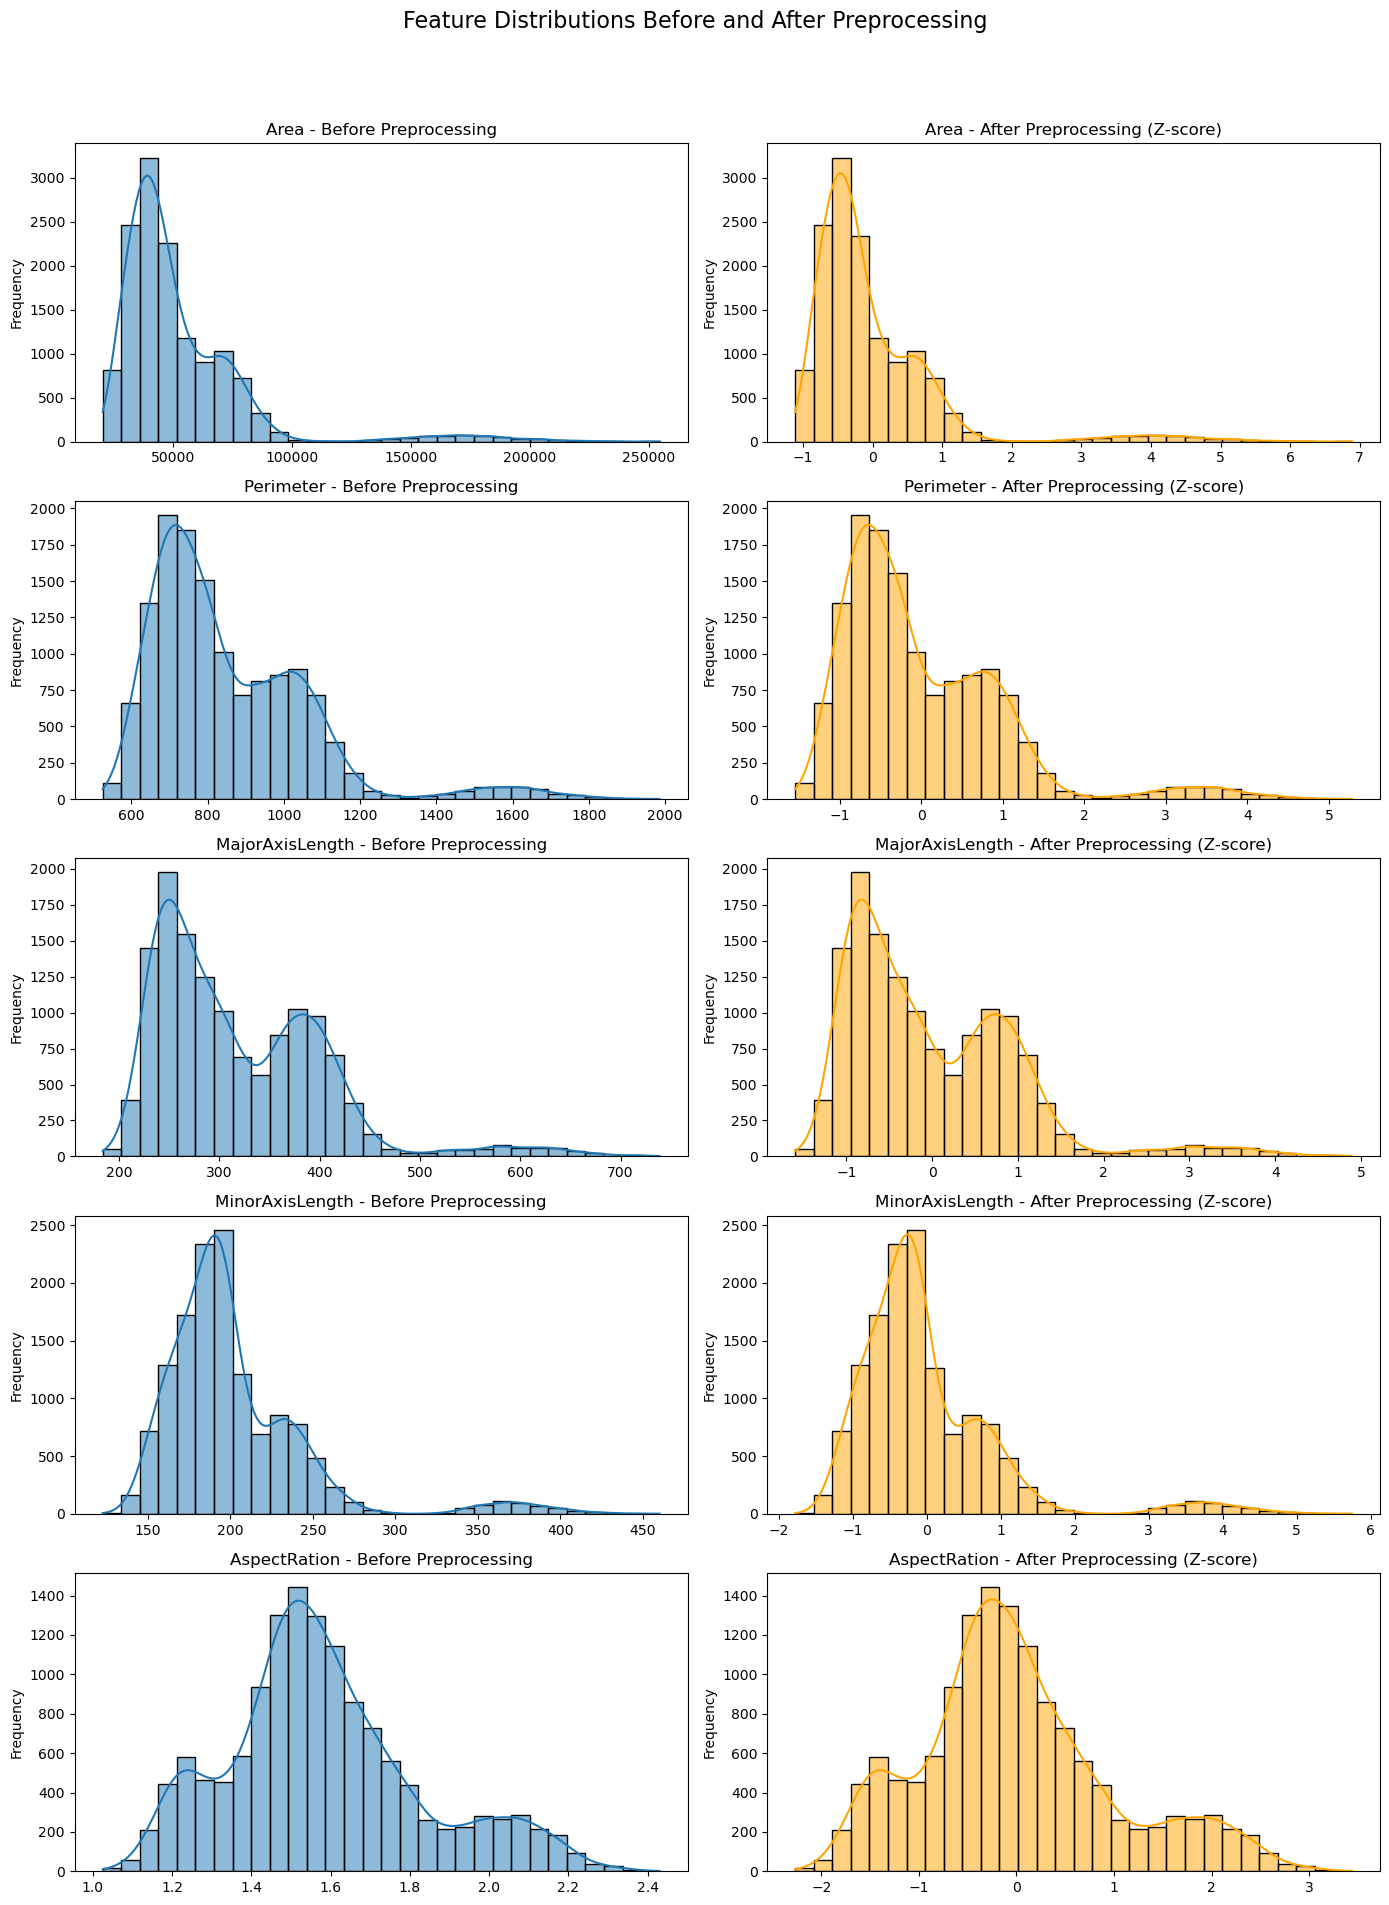

In [30]:
key_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation']

fig, axes = plt.subplots(len(key_features), 2, figsize=(14, 20))
fig.suptitle('Feature Distributions Before and After Preprocessing', fontsize=16)

for i, feature in enumerate(key_features):
    sns.histplot(combined_data_original[feature], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Before Preprocessing')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Frequency')
    
    sns.histplot(combined_data[feature], bins=30, kde=True, ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'{feature} - After Preprocessing (Z-score)')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


---
### Commentary on Feature Distributions


   - The overall shape of each feature's distribution remains unchanged after Z-score standardization. This is expected because Z-score scaling does not alter the relative shape of the data; it only rescales the values.



   - Z-score standardization has transformed each feature's values to have a mean of approximately `0` and a standard deviation of `1`.
   
   
   - Although the range of values is now centered around `0`, the skewness and outliers are still present, with extreme values translating into higher positive or negative Z-scores.



   - Outliers are still visible after scaling; however, they are now expressed as higher Z-scores. For example, the right tail of the `Area` and `Perimeter` distributions (previously extending far beyond the main cluster of data) is now compressed but still visible as values beyond `+3` or `-3` standard deviations.
---


   - The distributions of key features, such as `Area`, `Perimeter`, and `AspectRatio`, show a right-skewed shape with a concentration of values on the lower end and a few extreme values creating long tails. This skewness is especially noticeable in features like `Area` and `Perimeter`.
   
   
   - Additionally, some features exhibit multimodal characteristics, indicating the presence of multiple underlying subgroups or clusters within the data.

---



### 2. Correlation Analysis:

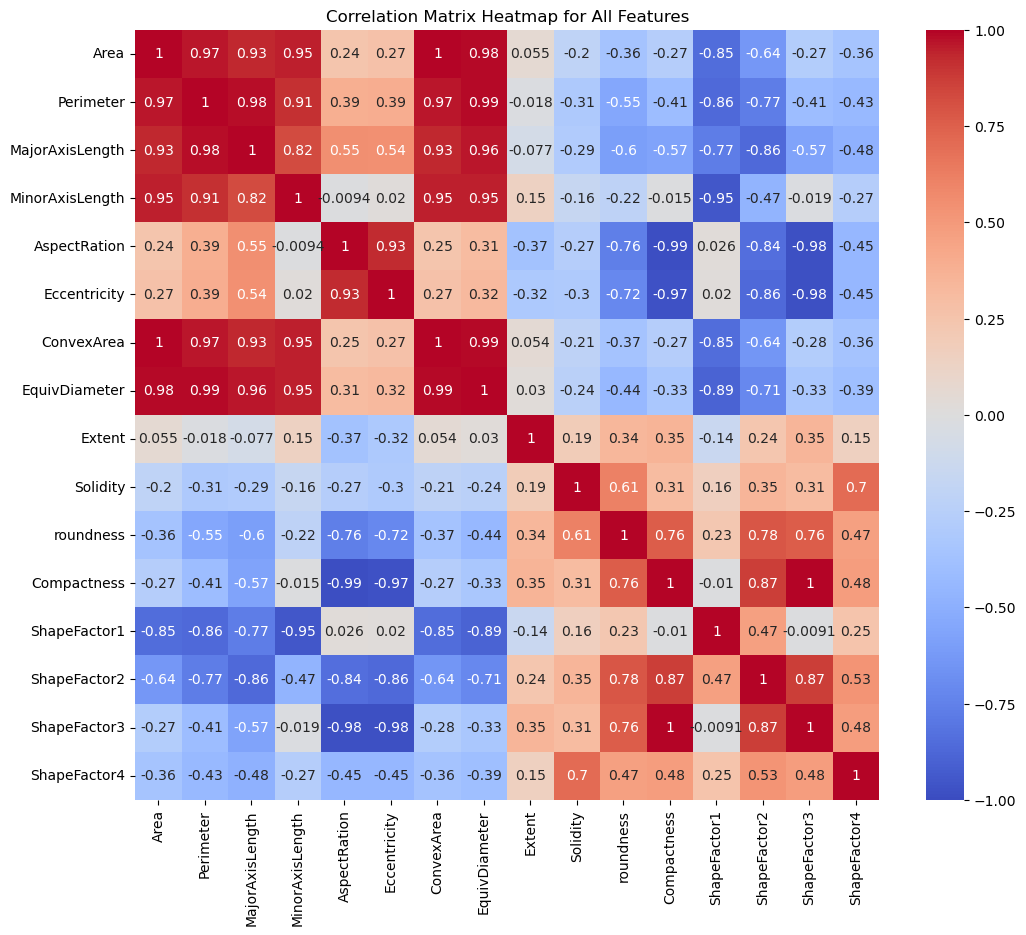

In [31]:
correlation_matrix = main_data.corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap for All Features")
plt.show()

### Correlation Analysis

To understand the relationships between various features in our dataset, we generated a correlation matrix heatmap. This visualization highlights the strength and direction of linear relationships between features, with values ranging from `-1` (strong negative correlation) to `1` (strong positive correlation). Here are some key insights from the analysis:

1. **Strong Positive Correlations**:
   - **Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, and EquivDiameter**: These features show strong positive correlations with each other (correlation values close to `1`). This is expected, as these geometric measurements are likely interrelated. For example, a larger area would often correspond to a larger perimeter and dimensions (major and minor axis lengths).
   - **ShapeFactor1 and ShapeFactor2**: These features also have a high positive correlation, suggesting that they may be measuring related shape characteristics.

2. **Negative Correlations**:
   - **Shape Factor Features (ShapeFactor1, ShapeFactor2, ShapeFactor3) with AspectRatio and Eccentricity**: The shape factor features show strong negative correlations with both AspectRatio and Eccentricity. This could indicate that as the aspect ratio or eccentricity (which measures elongation) increases, the compactness of the shape (represented by shape factors) decreases.
   - **Compactness with Other Shape Factors**: Compactness has strong negative correlations with the shape factor features, which makes sense as these metrics often measure different aspects of shape.


### Summary

The correlation matrix provides valuable insights into feature relationships:
- **Highly Correlated Groups**: We identified clusters of features that are highly correlated, such as the group of area-related measurements. These relationships are important to consider when selecting features for modeling, as high correlations may indicate redundancy.


- **Shape Characteristics**: The negative correlations among shape factors and dimensions (AspectRatio, Eccentricity) highlight contrasting shape characteristics, which could be useful for classification or clustering tasks.




### 3. Principal Component Analysis (PCA):



After applying PCA to the dataset, we analyzed the **explained variance** captured by each principal component. Here are the key findings:

1. **Variance Captured by Principal Components**:
   - The first principal component alone captures **55.45%** of the variance in the data, indicating that a large amount of information is concentrated in this component.
   - The first two components together capture **81.89%** of the variance, which suggests that most of the dataset's information can be represented in a 2-dimensional space.
   - By including the first three components, we capture **89.88%** of the variance, while the first four components account for **95.00%** of the variance.

2. **Scree Plot (Explained Variance Plot)**:
   - The scree plot shows a steep decline in variance after the first few components, with diminishing returns for each additional component.
   - After about five components, each additional component contributes very little to the total explained variance, indicating that most information is concentrated in the first few components.

3. **Dimensionality Reduction Impact**:
   - Using PCA, we can reduce the dataset from its original 16 features to around 3-5 principal components while retaining over **90%** of the original variance. This significantly simplifies the data, making it more manageable for visualization and modeling without sacrificing much information.
   - Reducing dimensionality can help mitigate overfitting and improve computational efficiency in machine learning models.



PCA effectively reduced the dataset’s dimensionality, allowing us to capture the majority of the variance with only a few components. This will be beneficial for subsequent analysis, enabling us to focus on a smaller subset of features while preserving the essential patterns and structure in the data.


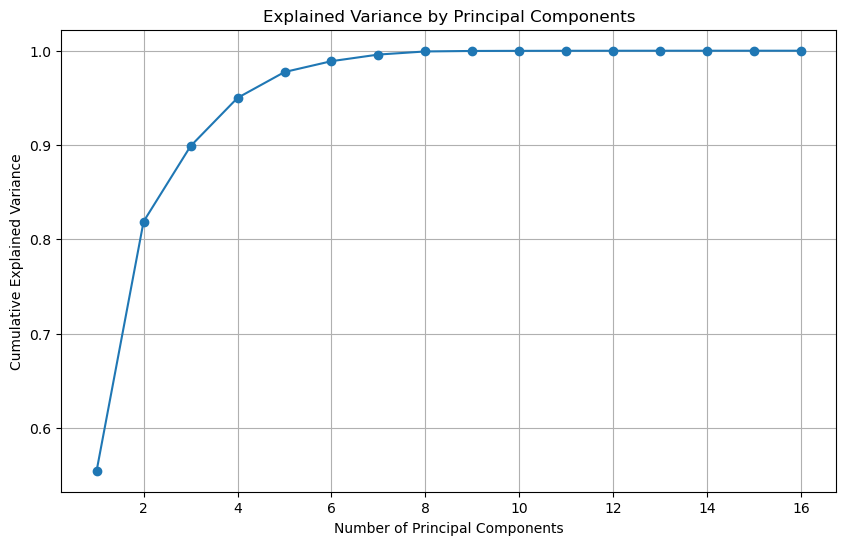

Principal Component 1: 0.5545 (Cumulative: 0.5545)
Principal Component 2: 0.2643 (Cumulative: 0.8189)
Principal Component 3: 0.0800 (Cumulative: 0.8988)
Principal Component 4: 0.0511 (Cumulative: 0.9500)
Principal Component 5: 0.0274 (Cumulative: 0.9774)
Principal Component 6: 0.0115 (Cumulative: 0.9889)
Principal Component 7: 0.0070 (Cumulative: 0.9959)
Principal Component 8: 0.0033 (Cumulative: 0.9992)
Principal Component 9: 0.0005 (Cumulative: 0.9998)
Principal Component 10: 0.0001 (Cumulative: 0.9999)
Principal Component 11: 0.0001 (Cumulative: 0.9999)
Principal Component 12: 0.0000 (Cumulative: 1.0000)
Principal Component 13: 0.0000 (Cumulative: 1.0000)
Principal Component 14: 0.0000 (Cumulative: 1.0000)
Principal Component 15: 0.0000 (Cumulative: 1.0000)
Principal Component 16: 0.0000 (Cumulative: 1.0000)


In [32]:
numeric_data = combined_data.select_dtypes(include=[np.number])

pca = PCA()
pca.fit(numeric_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

for i, variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {variance:.4f} (Cumulative: {cumulative_variance[i]:.4f})")


### 4. Data Insights:

From our analysis and preprocessing steps, we identified several meaningful insights that could guide further machine learning and analysis tasks:

1. **Strong Correlations Among Geometric Features**:
   - We observed high positive correlations among features like `Area`, `Perimeter`, `MajorAxisLength`, `MinorAxisLength`, `ConvexArea`, and `EquivDiameter`. These relationships suggest that these features capture related geometric aspects of the data, which could lead to redundancy in models. Dimensionality reduction techniques, like PCA, help address this by summarizing these correlated features into a smaller set of principal components.

2. **Shape and Structural Characteristics**:
   - Negative correlations between shape factors (`ShapeFactor1`, `ShapeFactor2`, etc.) and dimensions like `AspectRation` and `Eccentricity` reveal contrasting shape characteristics in the data. Features like `AspectRation` and `Eccentricity` likely capture elongation or aspect variations, while shape factors focus on compactness. These shape-related features may be valuable for distinguishing between different categories or classes in classification tasks.

3. **PCA Findings and Dimensionality Reduction**:
   - PCA allowed us to reduce the dimensionality of the dataset while retaining over 90% of the variance with just a few components. This transformation simplifies the data for further analysis or modeling, potentially reducing computational costs and minimizing overfitting risks. It suggests that much of the data’s structure can be represented in a low-dimensional space, which could be advantageous for visualization and exploratory analysis.

4. **Outliers and Distribution Patterns**:
   - Several features showed skewed distributions with notable outliers, particularly in `Area` and `Perimeter`. While these features were standardized during preprocessing, the presence of outliers may influence certain machine learning models sensitive to extreme values. Techniques like robust scaling or outlier handling could be considered in future analyses.

5. **Distinctive Role of Extent and Solidity**:
   - Features like `Extent` and `Solidity` displayed low correlations with other features, indicating they may capture unique aspects of the data. These features could provide valuable, independent information for model training, potentially enhancing model performance by contributing unique perspectives that other features do not cover.


The insights gained from correlation analysis, PCA, and feature distributions provide a solid foundation for further machine learning tasks. By reducing feature redundancy, identifying key shape-related metrics, and managing outliers, we have prepared a clean and informative dataset ready for model training and analysis. These insights will be particularly useful for classification or clustering tasks, where distinct shape and geometric features could play a crucial role in distinguishing between different categories.


### Challenges Faced and How They Were Addressed

1. **Handling Missing Values in Different Types of Features**:
   - Some features had a large number of missing values, which required a thoughtful approach to avoid introducing bias or losing valuable information. We used a combination of median, mode, and KNN imputation to handle these effectively, ensuring each feature’s characteristics were preserved.

2. **High Correlation Among Features**:
   - The geometric nature of the dataset resulted in high correlations among several features. To reduce this redundancy and prevent multicollinearity issues, we applied PCA to capture most of the data’s variance with fewer components.

3. **Presence of Outliers**:
   - Several features showed significant outliers, particularly in the `Area` and `Perimeter` columns. These outliers were managed through scaling (Z-score standardization) to ensure they did not disproportionately influence the analysis or subsequent models.
